In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/balaji2v/Inceptez_Batch19/main/MallCustomers.csv")

In [4]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [29]:
X = df.iloc[:,3:5]

In [30]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


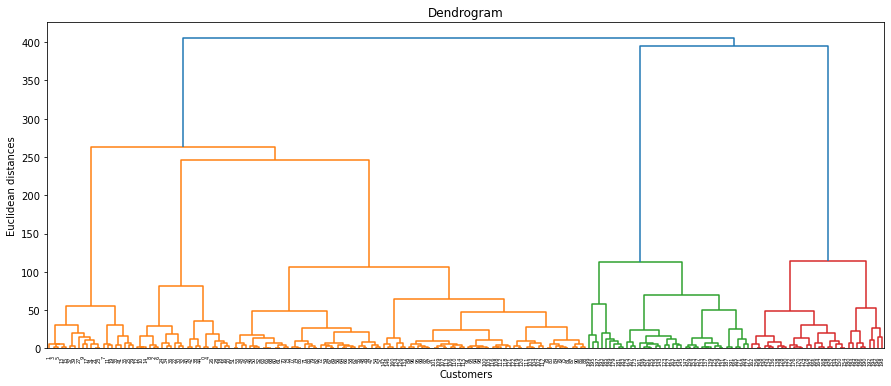

In [31]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

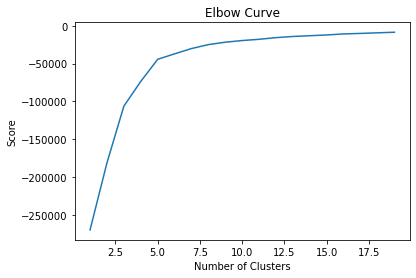

In [36]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [42]:
score

[-269981.28,
 -181363.59595959593,
 -106348.37306211119,
 -73679.78903948836,
 -44448.45544793371,
 -37233.81451071001,
 -30227.606513152015,
 -25011.83934915659,
 -21838.863692828912,
 -19634.55462934998,
 -17985.828572954615,
 -15810.838613705502,
 -14271.670282658519,
 -13251.277181393485,
 -12277.378115743904,
 -10885.000262228235,
 -10222.107223945011,
 -9430.67461332359,
 -8671.919581834287]

In [54]:
km = KMeans(n_clusters=5, random_state=42)
km.fit_predict(X)
silhouette_score (X, km.labels_)

0.553931997444648